In [2]:
# Import required modules
import numpy as np
import pandas as pd
import seaborn as sns
import shapefile as shp
import matplotlib.pyplot as plt

In [3]:
# Initialise visualisation set
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.mpl.rc("figure", figsize=(10, 6))

In [6]:
# Open the vector map
shp_path = "./data/County.shp"
sf = shp.Reader(shp_path)
len(sf.shapes())


47

In [7]:
# Explore the shapefile
sf.records()

[Record #0: [1, 5.677, 15.047, 2.0, 1.0, 'Turkana', 15.0468376942, 5.67698507035],
 Record #1: [2, 6.177, 11.974, 3.0, 2.0, 'Marsabit', 11.9741649875, 6.1768307404],
 Record #2: [3, 2.117, 7.355, 4.0, 3.0, 'Mandera', 7.35515432979, 2.11719606749],
 Record #3: [4, 4.61, 9.838, 5.0, 4.0, 'Wajir', 9.83840789987, 4.60958923426],
 Record #4: [5, 0.74, 5.03, 6.0, 5.0, 'West Pokot', 5.03027088343, 0.740480579545],
 Record #5: [6, 1.713, 8.311, 7.0, 6.0, 'Samburu', 8.31101343379, 1.71301446473],
 Record #6: [7, 2.06, 10.181, 8.0, 7.0, 'Isiolo', 10.181410715, 2.05982040515],
 Record #7: [8, 0.877, 5.964, 9.0, 8.0, 'Baringo', 5.96426557677, 0.877177301723],
 Record #8: [9, 0.245, 4.064, 10.0, 9.0, 'Keiyo-Marakwet', 4.06352699188, 0.245207562504],
 Record #9: [10, 0.202, 2.387, 11.0, 10.0, 'Trans Nzoia', 2.38726517511, 0.201982889373],
 Record #10: [11, 0.246, 3.076, 12.0, 11.0, 'Bungoma', 3.0759439997, 0.245741265658],
 Record #11: [12, 3.642, 11.281, 13.0, 12.0, 'Garissa', 11.2811263395, 3.6418

In [22]:
# Check one County
sf.record(12)[5]

'Uasin Gishu'

In [24]:
# Function to Convert the shapefile to a Pandas DataFrame
def read_shapefile(sf):
    # Fetch the headers from the shapefile
    fields = [x[0] for x in sf.fields][1:]
    # Fetch the coords from the shapefile
    records = [list(i) for i in sf.records()]
    shps = [s.points for s in sf.shapes()]
    # Create a DataFrame
    df = pd.DataFrame(columns=fields, data=records)
    # Add the coords to the DataFrame
    df = df.assign(coords=shps)
    return df

In [25]:
# Read the shapefile
df = read_shapefile(sf)
df.shape

(47, 9)

In [31]:
# Sample of the DataFrame
df.head(47)

,OBJECTID,AREA,PERIMETER,COUNTY3_,COUNTY3_ID,COUNTY,Shape_Leng,Shape_Area,coords
0,1,5.677,15.047,2.0,1.0,Turkana,15.046838,5.676985,"[(35.795925139933445, 5.344485759410418), (35...."
1,2,6.177,11.974,3.0,2.0,Marsabit,11.974165,6.176831,"[(36.050609588361965, 4.456217766237103), (36...."
2,3,2.117,7.355,4.0,3.0,Mandera,7.355154,2.117196,"[(41.62132644625865, 3.97673463779347), (41.62..."
3,4,4.610,9.838,5.0,4.0,Wajir,9.838408,4.609589,"[(39.31811523443071, 3.47196984263428), (39.31..."
4,5,0.740,5.030,6.0,5.0,West Pokot,5.030271,0.740481,"[(35.12744522072052, 2.6227116582165877), (35...."
5,6,1.713,8.311,7.0,6.0,Samburu,8.311013,1.713014,"[(36.736515044933526, 2.5137851235847393), (36..."
6,7,2.060,10.181,8.0,7.0,Isiolo,10.181411,2.059820,"[(37.945293426650494, 1.2628802057570283), (38..."
7,8,0.877,5.964,9.0,8.0,Baringo,5.964266,0.877177,"[(35.70706558191125, 1.4216008189227978), (35...."
8,9,0.245,4.064,10.0,9.0,Keiyo-Marakwet,4.063527,0.245208,"[(35.70279693632972, 1.24648702175881), (35.70..."
9,10,0.202,2.387,11.0,10.0,Trans Nzoia,2.387265,0.201983,"[(34.82015991235022, 1.2598303555865868), (34...."


In [40]:
# Plot the shapefile with matplotlib
def plot_shape(id, s=None):
    plt.figure()
    # Plot axes
    ax = plt.axes()
    ax.set_aspect('equal')
    # Store id number to be used
    shape_ex = sf.shape(id)
    # Create arrays with 0 in place of each element - len(shape_ex.points) Rows and 1 Column
    x_lon = np.zeros((len(shape_ex.points), 1)) # x-coordinates, longitude
    # Create arrays with 0 in place of each element - len(shape_ex.points) Rows and 1 Column
    y_lat = np.zeros((len(shape_ex.points), 1)) # y-coordinates, latitude
    for  ip in range(len(shape_ex.points)):
        x_lon[ip] = shape_ex.points[ip][0]
        y_lat[ip] = shape_ex.points[ip][1]
    # Plot the derived cordinates on the map
    plt.plot(x_lon, y_lat)
    x0 = np.mean(x_lon)
    y0 = np.mean(y_lat)
    plt.text(x0, y0, s, fontsize=10)
    # Use bounding box to set plot limits
    plt.xlim(shape_ex.bbox[0], shape_ex.bbox[2])
    return x0, y0

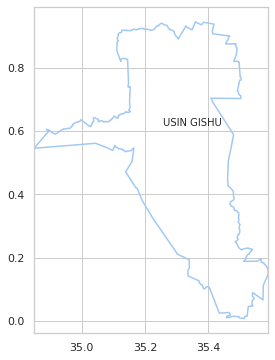

In [49]:
COUNTY_NAME = "USIN GISHU"
county_id = 12
plot_shape(county_id, COUNTY_NAME)
sf.shape(county_id)